In [1]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
import seaborn as sns

import glob
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
with open('df_anal2.pickle', 'rb') as f:
    df_anal2 = pickle.load(f)
with open('df_no_scailing_2.pickle', 'rb') as f:
    df_no_scailing_2 = pickle.load(f)

In [3]:
# Random Forest
with open ('clf_rf_anal2_ver1.pickle', 'rb') as f:
    clf_rf2 = pickle.load(f)
    
# GradientBoosting
with open ('clf_gb_anal2_ver1.pickle', 'rb') as f:
    clf_gb2 = pickle.load(f)
    
# XGBoost
with open ('clf_xgb_anal2_ver1.pickle', 'rb') as f:
    clf_xgb2 = pickle.load(f)
    
# LightGBM
with open ('clf_lgb_anal2_ver1.pickle', 'rb') as f:
    clf_lgb2 = pickle.load(f)
    
# CatBoost
with open ('clf_cb_anal2_ver1.pickle', 'rb') as f:
    clf_cb2 = pickle.load(f)

In [4]:
fi_df2 = pd.DataFrame(
    {'feature_names': df_anal2.columns[:-1], 
     'fi_rf': clf_rf2.feature_importances_, 
     'fi_gb': clf_gb2.feature_importances_, 
     'fi_xgb': clf_xgb2.feature_importances_, 
     'fi_lgb': clf_lgb2.feature_importances_, 
     'fi_cb': clf_cb2.feature_importances_})

In [5]:
fi_df2

,feature_names,fi_rf,fi_gb,fi_xgb,fi_lgb,fi_cb
0,year,0.006539,0.058187,0.008182,278,4.147553
1,region,0.011777,0.039079,0.004056,465,2.946007
2,town_t,0.005264,0.025454,0.012054,69,1.080789
3,apt_t,0.003266,0.010413,0.006097,89,0.244381
4,sex,0.004496,0.046556,0.031020,42,2.668307
...,...,...,...,...,...,...
373,N_RETIN,0.010576,0.010207,0.002548,499,1.028194
374,N_B1,0.010529,0.006851,0.002347,403,0.503481
375,N_B2,0.010359,0.007060,0.002285,321,0.294844
376,N_NIAC,0.010424,0.006682,0.002517,371,0.472351


In [6]:
df2_ = fi_df2.copy()
for col in fi_df2.columns[1:]:
    df2_[col] = df2_[col].rank(ascending=False)
df2_ = df2_[['fi_rf','fi_gb','fi_xgb','fi_lgb','fi_cb']]
df2_

,fi_rf,fi_gb,fi_xgb,fi_lgb,fi_cb
0,56.0,2.0,9.0,42.5,1.0
1,12.0,5.0,42.0,15.0,5.0
2,61.0,8.0,3.0,97.5,23.0
3,93.0,20.0,14.0,86.5,99.0
4,68.0,4.0,1.0,123.5,6.0
...,...,...,...,...,...
373,31.0,21.0,165.0,11.0,26.0
374,32.0,39.0,216.0,23.0,54.0
375,36.0,37.0,236.0,36.0,87.0
376,34.0,41.0,173.0,30.0,60.0


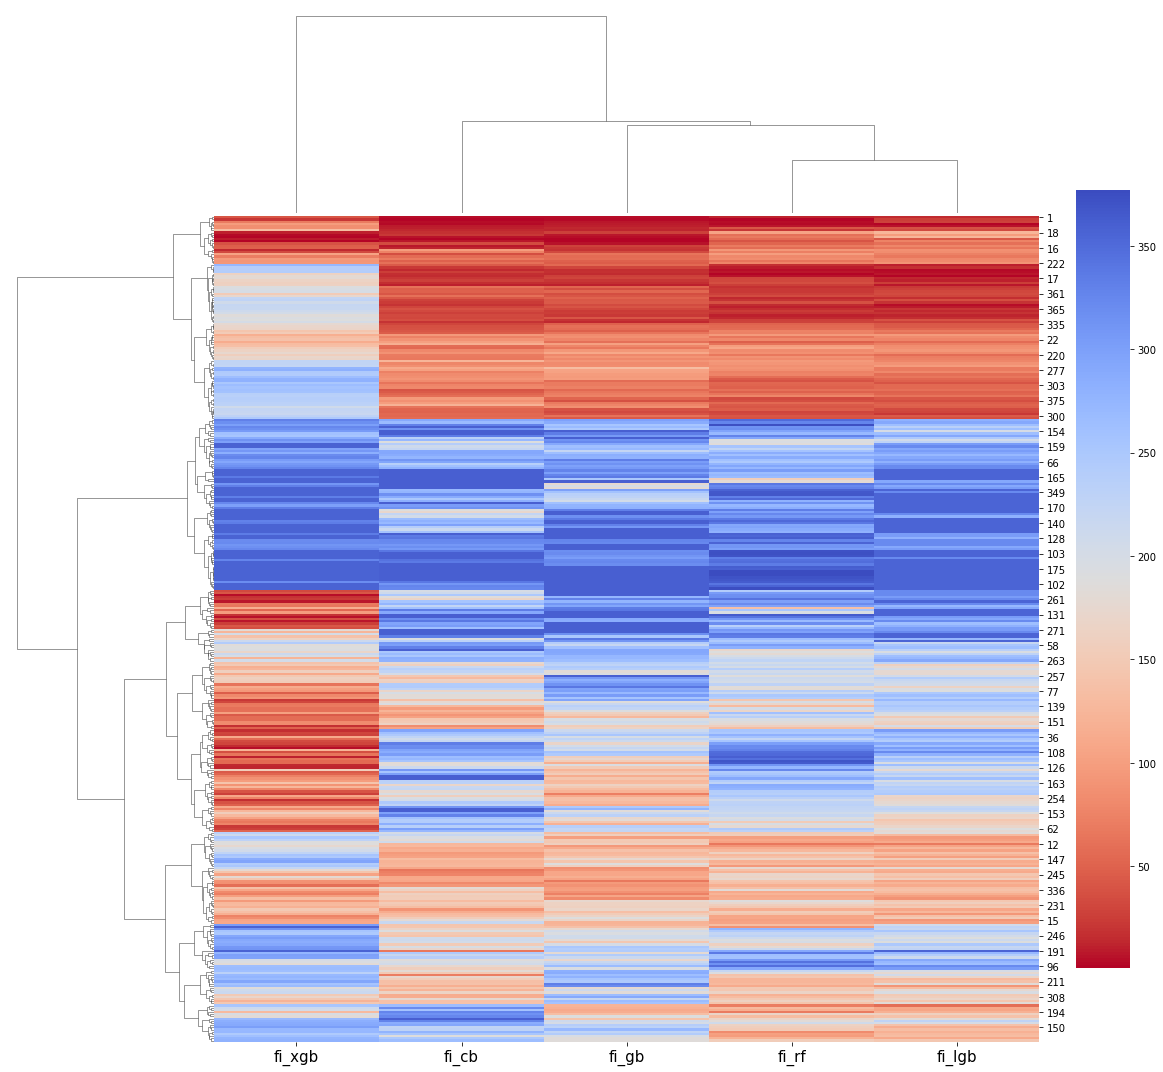

In [7]:
plt.rc('xtick', labelsize=15)
cmap = sns.color_palette('coolwarm_r', as_cmap=True)
sns.clustermap(df2_, method='ward', cmap=cmap, figsize=(15, 15), cbar_pos=(1, 0.1, 0.05, 0.72))

In [8]:
fi_df2 = pd.DataFrame(
    {'feature_names': df_anal2.columns[:-1], 
     'fi_rf': clf_rf2.feature_importances_, 
     'fi_gb': clf_gb2.feature_importances_, 
     #'fi_xgb': clf_xgb2.feature_importances_, 
     'fi_lgb': clf_lgb2.feature_importances_, 
     'fi_cb': clf_cb2.feature_importances_})

In [9]:
fi_df2.index = fi_df2['feature_names']

In [10]:
fi_df2_rank = fi_df2.copy()
for col in fi_df2_rank.columns[1:]:
    fi_df2_rank[col] = fi_df2_rank[col].rank(ascending=False)

fi_df2_rank['avg_rank'] = fi_df2_rank[fi_df2_rank.columns[1:]].mean(axis=1) # 행에 대해서 평균
fi_df2_rank

,feature_names,fi_rf,fi_gb,fi_lgb,fi_cb,avg_rank
feature_names,,,,,,
year,year,56.0,2.0,42.5,1.0,25.375
region,region,12.0,5.0,15.0,5.0,9.250
town_t,town_t,61.0,8.0,97.5,23.0,47.375
apt_t,apt_t,93.0,20.0,86.5,99.0,74.625
sex,sex,68.0,4.0,123.5,6.0,50.375
...,...,...,...,...,...,...
N_RETIN,N_RETIN,31.0,21.0,11.0,26.0,22.250
N_B1,N_B1,32.0,39.0,23.0,54.0,37.000
N_B2,N_B2,36.0,37.0,36.0,87.0,49.000


In [11]:
fi_df2_rank = fi_df2_rank.sort_values(by='avg_rank')[:10]
fi_df2_rank

,feature_names,fi_rf,fi_gb,fi_lgb,fi_cb,avg_rank
feature_names,,,,,,
HE_HBsAg,HE_HBsAg,3.0,9.0,2.0,3.0,4.250
HE_BUN,HE_BUN,1.0,3.0,24.5,2.0,7.625
HE_crea,HE_crea,8.0,10.0,6.0,9.0,8.250
region,region,12.0,5.0,15.0,5.0,9.250
HE_TG,HE_TG,5.0,16.0,3.0,13.0,9.250
HE_ht,HE_ht,2.0,15.0,7.0,17.0,10.250
HE_ast,HE_ast,4.0,7.0,28.0,4.0,10.750
HE_Bplt,HE_Bplt,6.0,26.0,1.0,15.0,12.000
HE_WBC,HE_WBC,7.0,18.0,4.0,25.0,13.500


In [12]:
fi_df2_rank.to_csv('fi_rank.csv', sep='\t')
with open('fi_df2_rank.pickle', 'wb') as f:
            pickle.dump(fi_df2_rank, f)